In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.5 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

pd.set_option('display.max_columns', None)

In [ ]:
#loading data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f'shape of data :{df.shape}')
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


# Data Manipulation

In [ ]:
# Delete unnecessary column
df = df.drop(['customerID'], axis = 1)

df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df[df['tenure'] == 0].shape

(11, 20)

since the shape of tenure column with value of zero and total charges column with nan value are same.
so we are dropping this all nan values..

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].shape

(0, 20)

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Visualization

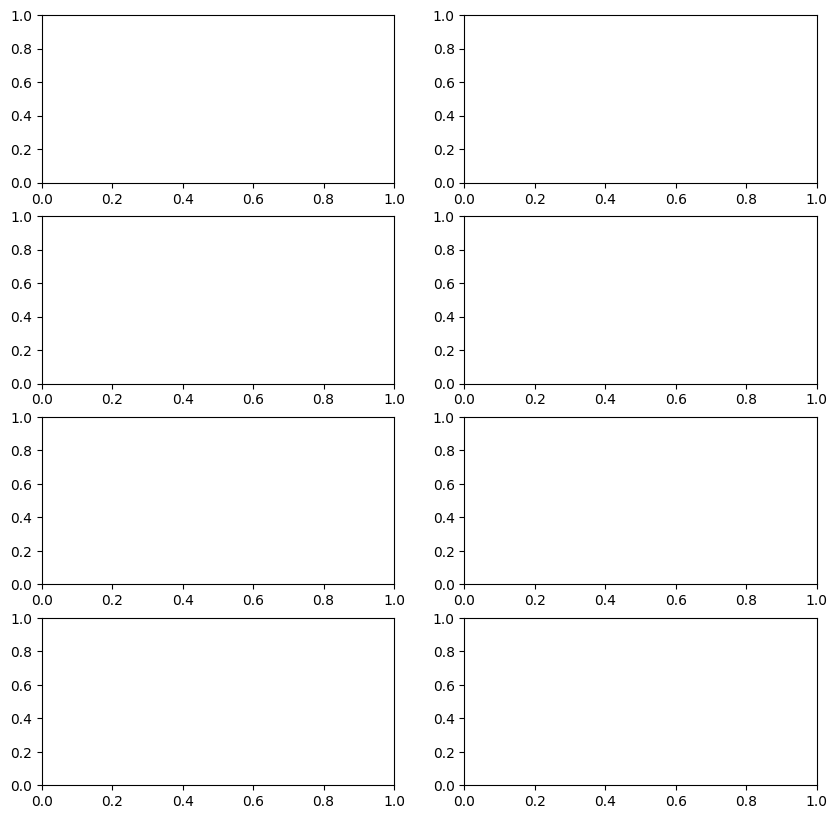

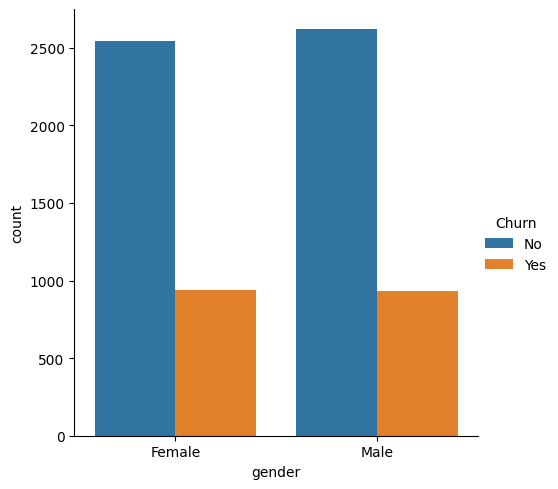

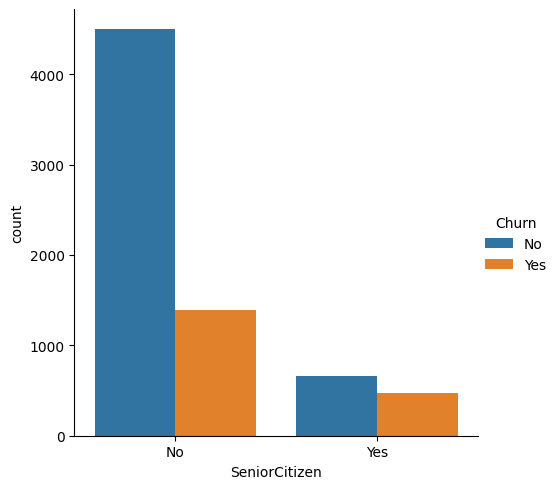

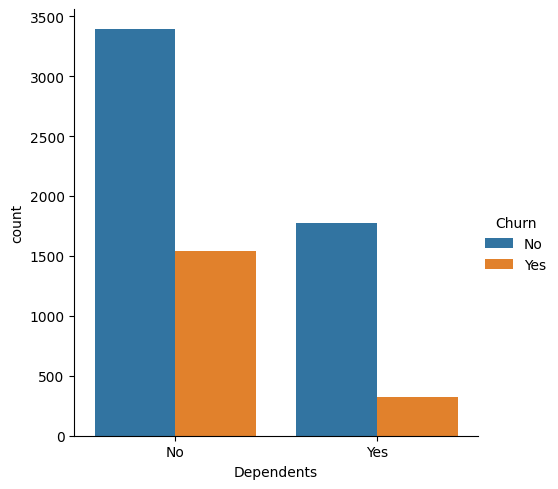

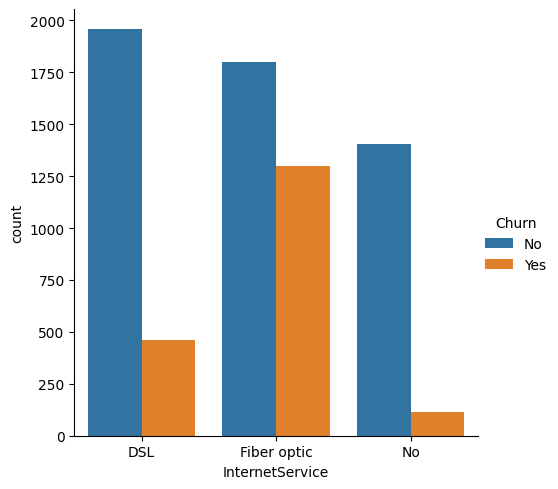

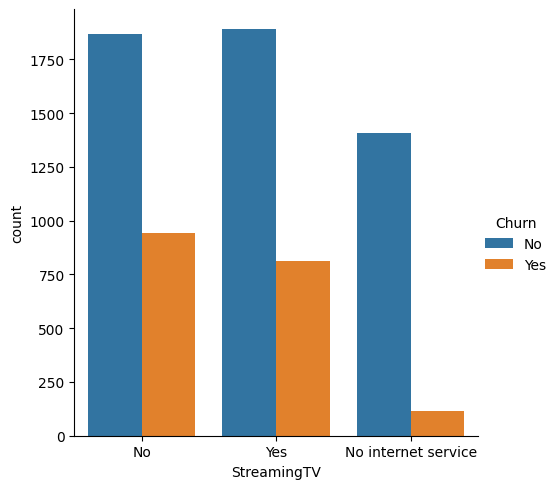

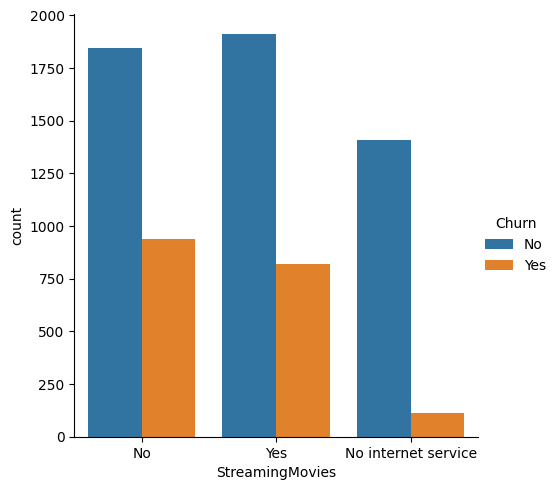

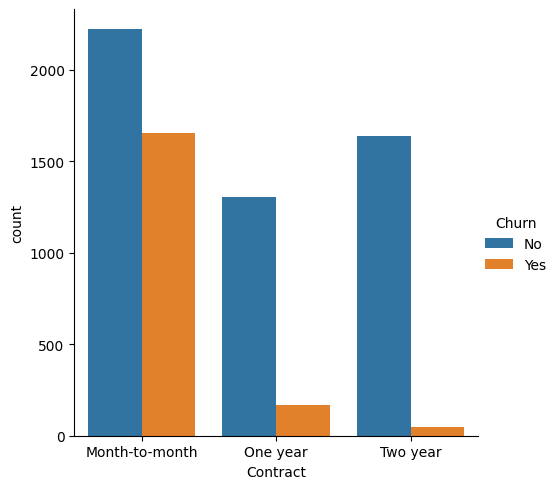

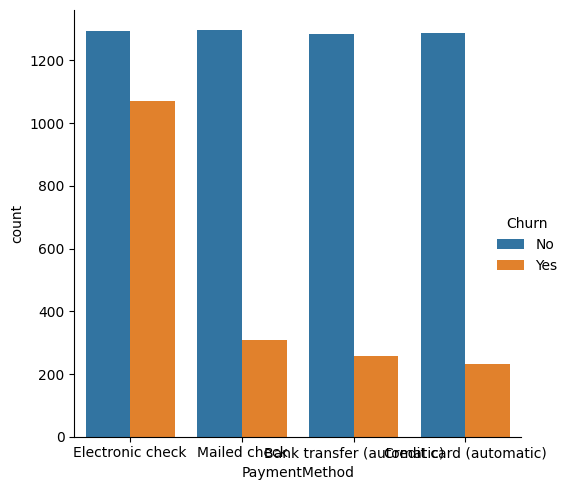

In [ ]:
# visualizing categorical variables

# Set the style of the plot
# sns.set_style("whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))

# Use catplot to visualize the categorical variables
sns.catplot(x="gender", hue="Churn", kind="count", data=df, ax=axs[0][0])
sns.catplot(x="SeniorCitizen", hue="Churn", kind="count", data=df, ax=axs[0][1])
sns.catplot(x="Dependents", hue="Churn", kind="count", data=df, ax=axs[1][0])
sns.catplot(x="InternetService", hue="Churn", kind="count", data=df, ax=axs[1][1])
sns.catplot(x="StreamingTV", hue="Churn", kind="count", data=df, ax=axs[2][0])
sns.catplot(x="StreamingMovies", hue="Churn", kind="count", data=df, ax=axs[2][1])
sns.catplot(x="Contract", hue="Churn", kind="count", data=df, ax=axs[3][0])
sns.catplot(x="PaymentMethod", hue = 'Churn', kind="count",data = df, ax = axs[3][1])

plt.tight_layout()
plt.show()

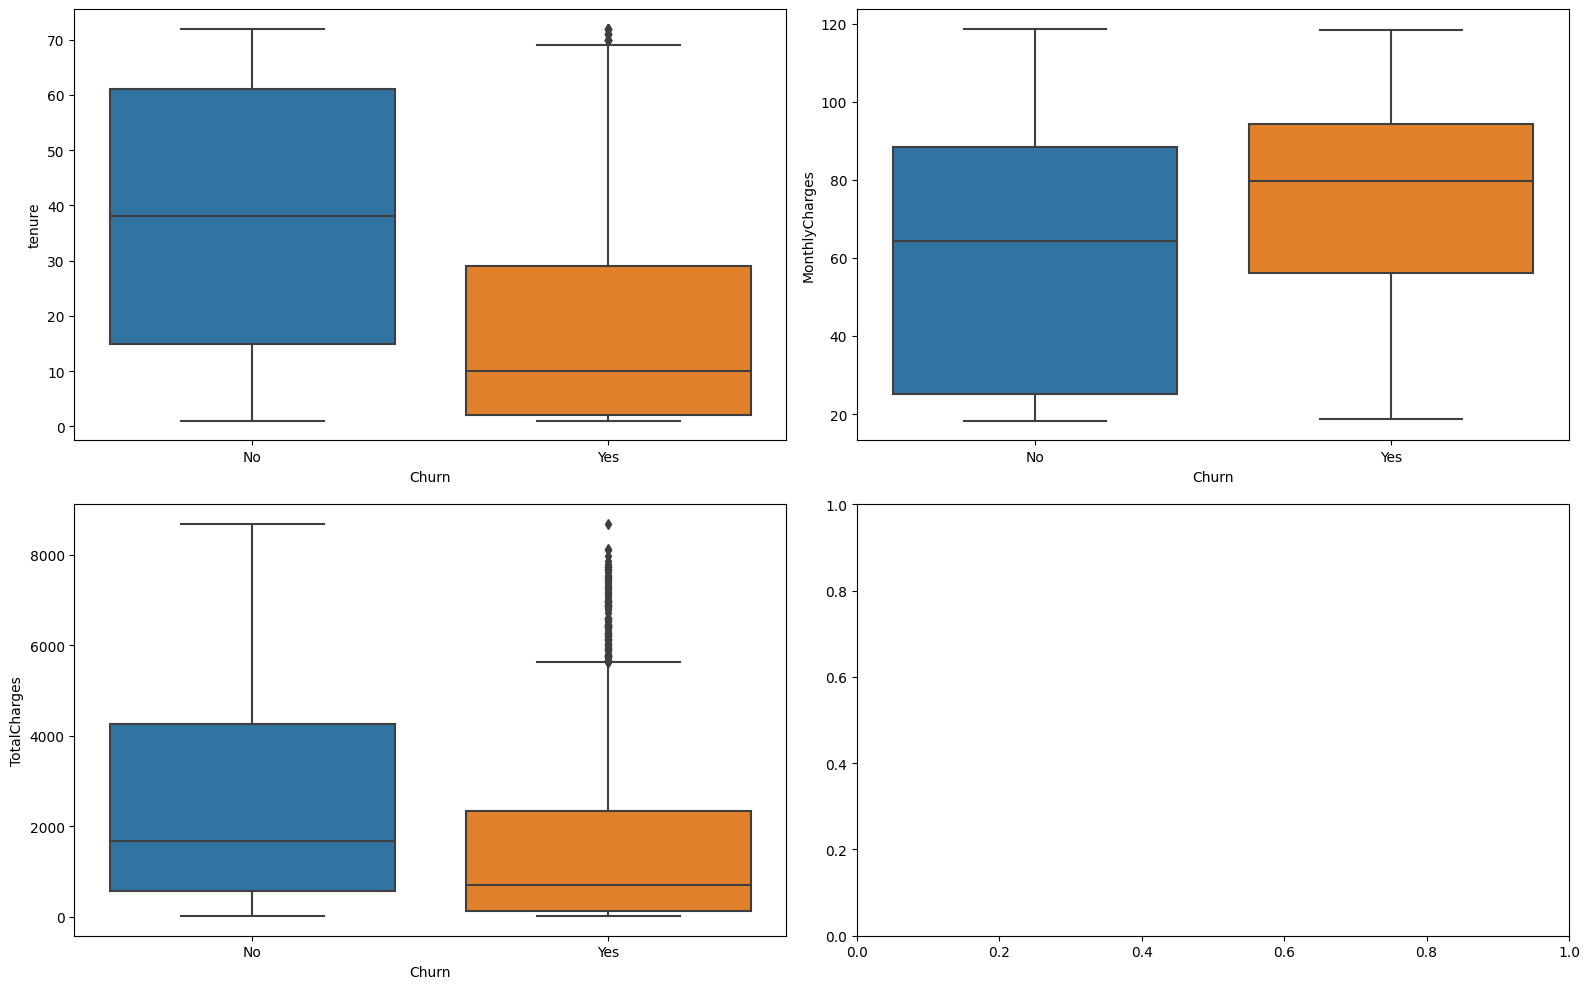

In [ ]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Churn', y = 'tenure', data = df, ax = ax[0][0])
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = df, ax = ax[0][1])
sns.boxplot(x = 'Churn', y = 'TotalCharges', data = df, ax = ax[1][0])

plt.tight_layout()
plt.show()

<Axes: xlabel='tenure', ylabel='Density'>

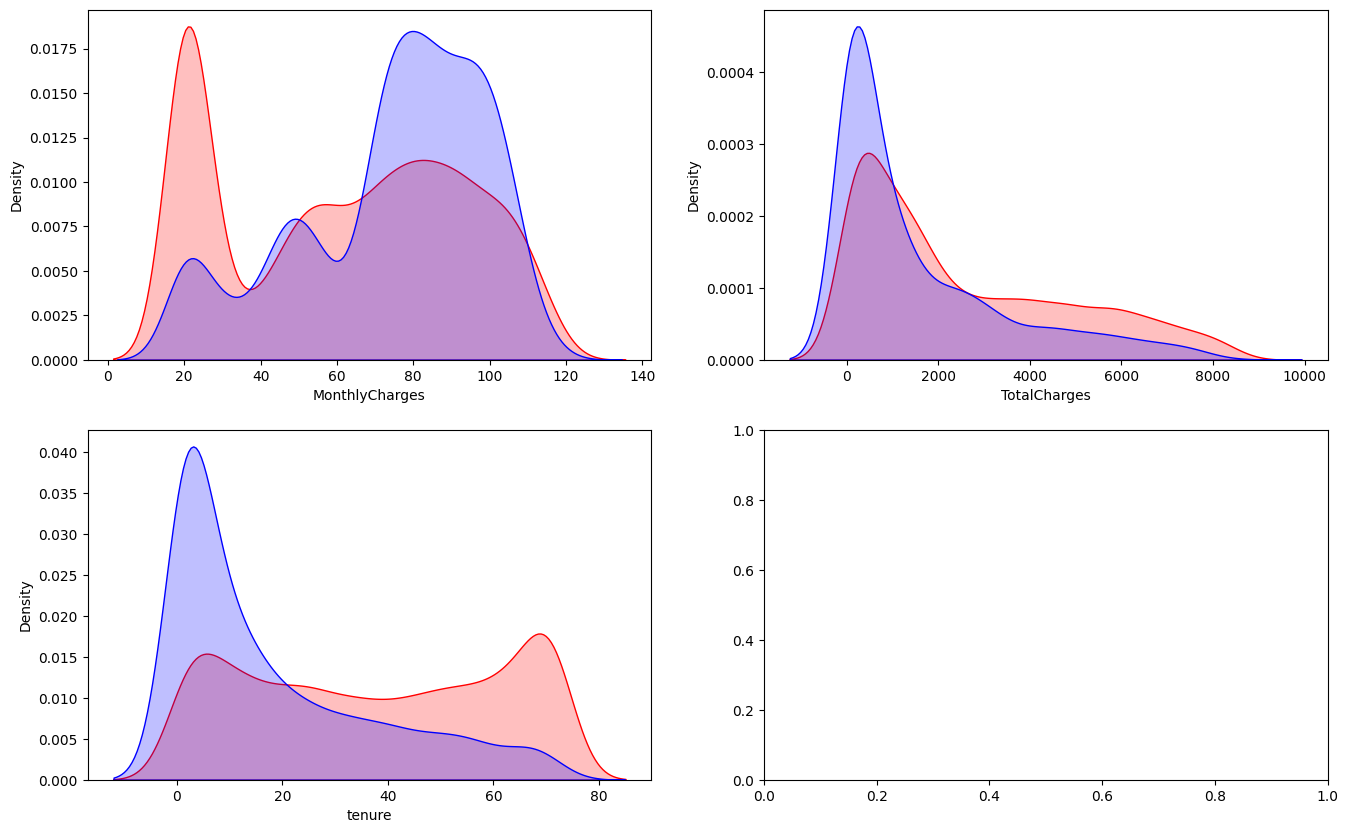

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No')], color="Red", shade=True, ax=ax[0][0])
sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes')], color="Blue", shade=True, ax=ax[0][0])

sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No')], color="Red", shade=True, ax=ax[0][1])
sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes')], color="Blue", shade=True, ax=ax[0][1])

sns.kdeplot(df.tenure[(df["Churn"] == 'No')], color="Red", shade=True, ax=ax[1][0])
sns.kdeplot(df.tenure[(df["Churn"] == 'Yes')], color="Blue", shade=True, ax=ax[1][0])

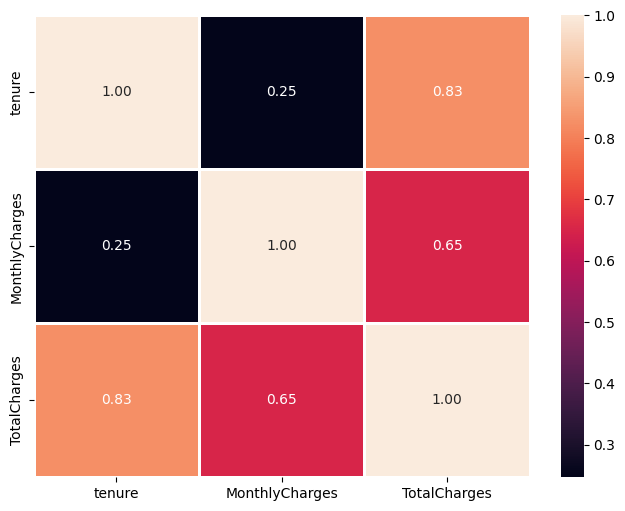

In [ ]:
# heatmap 

plt.figure(figsize = (8, 6))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

# Data Preprocessing

In [ ]:
def preprocess_data(df):
    # separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    # apply StandardScaler to numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # apply LabelEncoder to categorical columns
    encoder = LabelEncoder()
    df[categorical_cols] = df[categorical_cols].apply(encoder.fit_transform)
    
    return df

In [ ]:
df = preprocess_data(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.280248,0,1,0,0,2,0,0,0,0,0,1,2,-1.161694,-0.994194,0
1,1,0,0,0,0.064303,1,0,0,2,0,2,0,0,0,1,0,3,-0.260878,-0.173740,0
2,1,0,0,0,-1.239504,1,0,0,2,2,0,0,0,0,0,1,3,-0.363923,-0.959649,1
3,1,0,0,0,0.512486,0,1,0,2,0,2,2,0,0,1,0,0,-0.747850,-0.195248,0
4,0,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,2,0.196178,-0.940457,1


In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 40, 
                                                    stratify=y)

# Modeling

In [ ]:
models = {'LogisticRegression': LogisticRegression(max_iter=10000),
          'KNeighborsClassifier': KNeighborsClassifier(),
          'SVC': SVC(),
          'GaussianNB':GaussianNB(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier': RandomForestClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier(),
          'AdaBoostClassifier': AdaBoostClassifier(),
          'XGBClassifier': XGBClassifier(),
          'CatBoostClassifier':CatBoostClassifier()}

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)

    model_scores = pd.DataFrame(model_scores,index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score')
    
    
    return model_scores

In [ ]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

Learning rate set to 0.02154
0:	learn: 0.6776705	total: 49ms	remaining: 48.9s
1:	learn: 0.6643412	total: 51.4ms	remaining: 25.6s
2:	learn: 0.6517543	total: 53.4ms	remaining: 17.7s
3:	learn: 0.6401465	total: 55.3ms	remaining: 13.8s
4:	learn: 0.6283143	total: 58.1ms	remaining: 11.6s
5:	learn: 0.6174912	total: 60.1ms	remaining: 9.96s
6:	learn: 0.6076310	total: 62.1ms	remaining: 8.81s
7:	learn: 0.5980297	total: 64.1ms	remaining: 7.95s
8:	learn: 0.5887155	total: 66.2ms	remaining: 7.29s
9:	learn: 0.5799983	total: 67.9ms	remaining: 6.73s
10:	learn: 0.5720546	total: 70ms	remaining: 6.29s
11:	learn: 0.5647151	total: 72ms	remaining: 5.93s
12:	learn: 0.5574484	total: 73.9ms	remaining: 5.61s
13:	learn: 0.5513112	total: 75.7ms	remaining: 5.33s
14:	learn: 0.5448848	total: 77.7ms	remaining: 5.1s
15:	learn: 0.5381046	total: 79.6ms	remaining: 4.9s
16:	learn: 0.5322259	total: 81.6ms	remaining: 4.72s
17:	learn: 0.5268506	total: 83.6ms	remaining: 4.56s
18:	learn: 0.5216280	total: 85.5ms	remaining: 4.42s
1

In [ ]:
cm = sns.color_palette('PuBuGn',as_cmap=True)
score = model_scores.style.background_gradient(cmap=cm)
score

,Score
DecisionTreeClassifier,0.729922
KNeighborsClassifier,0.761194
GaussianNB,0.771855
RandomForestClassifier,0.786780
CatBoostClassifier,0.791756
XGBClassifier,0.794598
SVC,0.801706
LogisticRegression,0.803127
GradientBoostingClassifier,0.803127
AdaBoostClassifier,0.805259


We will now based AdaBoostClassifier and GradientBoostingClassifier on the CV on the f1 scores

# HyperTuning by Random search CV


In [ ]:
models = {'AdaBoostClassifier': AdaBoostClassifier(),
          'GradientBoostingClassifier': GradientBoostingClassifier()
         }

params = {'AdaBoostClassifier': {'n_estimators': [20,50,100,200,400],
                                'learning_rate': [0.001,0.01,0.1,1.0],
                                'algorithm': ['SAMME','SAMME.R']},
          'GradientBoostingClassifier' : {'loss': ['deviance', 'exponential'],
                                          'learning_rate': [0.001,0.01,0.1,1.0],
                                          'n_estimators': [20,50,100,200,400],
                                          'criterion': ['friedman_mse', 'mse'],
                                          'max_depth' : [2,3,6,10,20],
                                          'ccp_alpha' : [0.0,0.001,0.01,0.1,1]
                                          }
         }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def randomsearch_cv_scores(models, params, X_train, X_test, y_train, y_test):
    np.random.seed(0)
    
    model_rs_scores = {}
    model_rs_best_param = {}
    
    for name, model in models.items():
        rs_model = RandomizedSearchCV(model,
                                      param_distributions=params[name],
                                      cv=5,
                                      n_iter=20,n_jobs=-1,
                                      verbose=2)        
        rs_model.fit(X_train,y_train)
        model_rs_scores[name] = rs_model.score(X_test,y_test)
        model_rs_best_param[name] = rs_model.best_params_
        
    return model_rs_scores, model_rs_best_param

In [ ]:
model_rs_scores,model_rs_best_param = randomsearch_cv_scores(models,params,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
model_rs_scores = pd.DataFrame(model_rs_scores,index=['Score']).transpose()
model_rs_scores.sort_values('Score')

,Score
GradientBoostingClassifier,0.803127
AdaBoostClassifier,0.805970


In [ ]:
model_rs_best_param

{'AdaBoostClassifier': {'n_estimators': 100,
  'learning_rate': 1.0,
  'algorithm': 'SAMME.R'},
 'GradientBoostingClassifier': {'n_estimators': 20,
  'max_depth': 3,
  'loss': 'exponential',
  'learning_rate': 0.1,
  'criterion': 'friedman_mse',
  'ccp_alpha': 0.0}}

# 6. Model Evalution


In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=400, max_depth=6, loss= 'exponential', learning_rate= 0.1,
                                criterion= 'squared_error', ccp_alpha= 0.001)
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1033
           1       0.69      0.53      0.60       374

    accuracy                           0.81      1407
   macro avg       0.77      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



Conclusion:

The chosen model was GradientBoosting since it´s the most accurate.Through the analysis of feature importance, we can assume that Contract is the tje most important features of classification.